In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import string
import math
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
ls

drive/  sample_data/


In [7]:
cd drive/MyDrive

/content/drive/MyDrive


In [8]:
cd 'sentiment analysis'

/content/drive/MyDrive/sentiment analysis


In [9]:
cd reviews

/content/drive/MyDrive/sentiment analysis/reviews


In [10]:
df_1 = pd.read_csv('1_Clayton Reserve.csv')
# df_2 = pd.read_csv('.csv')
# df_3 = pd.read_csv('.csv')
# df_4 = pd.read_csv('.csv')

In [11]:
print(df_1.columns)

Index(['Icon', 'Name', 'Detail', 'Time', 'Review', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [47]:
len(df_1['Review'])

341

In [48]:
df_1.sample(4)

,Icon,Name,Detail,Time,Review,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
119,https://lh3.googleusercontent.com/a-/ALV-UjWxS...,Lisa Lisa,Local Guide · 28 reviews,5 years ago,food staff nice comes patrons st vinnies food ...,NaN,NaN,Like,Share
19,https://lh3.googleusercontent.com/a-/ALV-UjXvs...,Jules Wilkinson,24 reviews · 17 photos,4 years ago,totally fenced dog park seats shade humans gen...,NaN,NaN,Share,Like
276,https://lh3.googleusercontent.com/a/ACg8ocJU74...,Debbie Pietersen,Local Guide · 84 reviews · 7 photos,4 years ago,nan,NaN,NaN,NaN,NaN
265,https://lh3.googleusercontent.com/a/ACg8ocLRDg...,Gilhyun Na,NaN,4 years ago,nan,NaN,NaN,NaN,NaN


In [15]:
len(df_1)

341

In [49]:
df_1['Review'].isnull().values.sum()

0

In [17]:
df_1_remove_null = df_1.dropna(subset=['Review'])

In [50]:
df_1_remove_null['Review'].isnull().values.sum()

0

In [52]:
df_1_remove_null

,Icon,Name,Detail,Time,Review,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,https://lh3.googleusercontent.com/a-/ALV-UjVg1...,Sarah Abendschein,Local Guide · 75 reviews · 71 photos,6 months ago,"Excellent dog park. Easy parking, safe fence, ...",NaN,NaN,Share,NaN
1,https://lh3.googleusercontent.com/a-/ALV-UjU-C...,Antony D,Local Guide · 228 reviews · 697 photos,a week ago,Soccer here was awesome!\n\nGreat environment …,NaN,NaN,Like,Share
2,https://lh3.googleusercontent.com/a-/ALV-UjXAU...,cj,Local Guide · 56 reviews · 16 photos,4 months ago,"Conveniently located, right in the middle of t...",NaN,NaN,Share,Like
3,https://lh3.googleusercontent.com/a-/ALV-UjXWp...,Rouven Grossmann,"Local Guide · 253 reviews · 2,070 photos",2 years ago,My favourite park close to the Melbourne CBD.\...,NaN,NaN,Share,NaN
4,https://lh3.googleusercontent.com/a/ACg8ocLB5p...,Mayank Minki,Local Guide · 39 reviews · 72 photos,a year ago,"Clean, Fenced and Easy to Park Dog park in the...",NaN,NaN,Share,NaN
...,...,...,...,...,...,...,...,...,...
167,https://lh3.googleusercontent.com/a-/ALV-UjWAG...,Juan Toscano,24 reviews,8 years ago,awesome for our four legs friends,NaN,NaN,Like,Share
168,https://lh3.googleusercontent.com/a-/ALV-UjUFt...,Tommy Lewis,Local Guide · 93 reviews · 41 photos,5 years ago,Fantastic Dog park.,NaN,NaN,Like,Share
169,https://lh3.googleusercontent.com/a/ACg8ocKARk...,Kylie Walker,2 reviews,5 years ago,Friendly dog park,NaN,NaN,Like,Share
170,https://lh3.googleusercontent.com/a-/ALV-UjVk5...,Rhece Moore,Local Guide · 89 reviews · 97 photos,4 years ago,Awesome space,NaN,NaN,Like,Share


In [19]:
i = 0
for text in df_1_remove_null['Review']:
    print(text,'\n')
    i+=1
    if i == 10:
        break

Excellent dog park. Easy parking, safe fence, has water and poo bags and lots of lovely shade and benches. We had a Lappy meetup here and it was fab! 

Soccer here was awesome!

Great environment … 

Conveniently located, right in the middle of the hustle and bustle! Unfortunately this means it attracts people that drink at the park, and they've been known to leave unsafe rubbish behind. Also find that people are less likely to clean up after their dogs at this park specifically. 

My favourite park close to the Melbourne CBD.
A lot of space for dogs of all sizes to run around l, make friends and exhaust themselves. … 

Clean, Fenced and Easy to Park Dog park in the heart of CBD. You can park on boundary road. Plenty of car parking. … 

One of our favourite fully fenced dog parks. Two water fountains for dogs and humans, two bag and bin stations, prickle free grass is a huge bonus, plenty of seating and when the tress grow, there will be shade.  For evening and early morning there is l

In [20]:
df_clean_1 = df_1_remove_null.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [57]:
df_clean_1

,Icon,Name,Detail,Time,Review,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,https://lh3.googleusercontent.com/a-/ALV-UjVg1...,Sarah Abendschein,Local Guide 75 reviews 71 photos,6 months ago,"Excellent dog park. Easy parking, safe fence, ...",nan,nan,Share,nan
1,https://lh3.googleusercontent.com/a-/ALV-UjU-C...,Antony D,Local Guide 228 reviews 697 photos,a week ago,Soccer here was awesome!\n\nGreat environment,nan,nan,Like,Share
2,https://lh3.googleusercontent.com/a-/ALV-UjXAU...,cj,Local Guide 56 reviews 16 photos,4 months ago,"Conveniently located, right in the middle of t...",nan,nan,Share,Like
3,https://lh3.googleusercontent.com/a-/ALV-UjXWp...,Rouven Grossmann,"Local Guide 253 reviews 2,070 photos",2 years ago,My favourite park close to the Melbourne CBD.\...,nan,nan,Share,nan
4,https://lh3.googleusercontent.com/a/ACg8ocLB5p...,Mayank Minki,Local Guide 39 reviews 72 photos,a year ago,"Clean, Fenced and Easy to Park Dog park in the...",nan,nan,Share,nan
...,...,...,...,...,...,...,...,...,...
167,https://lh3.googleusercontent.com/a-/ALV-UjWAG...,Juan Toscano,24 reviews,8 years ago,awesome for our four legs friends,nan,nan,Like,Share
168,https://lh3.googleusercontent.com/a-/ALV-UjUFt...,Tommy Lewis,Local Guide 93 reviews 41 photos,5 years ago,Fantastic Dog park.,nan,nan,Like,Share
169,https://lh3.googleusercontent.com/a/ACg8ocKARk...,Kylie Walker,2 reviews,5 years ago,Friendly dog park,nan,nan,Like,Share
170,https://lh3.googleusercontent.com/a-/ALV-UjVk5...,Rhece Moore,Local Guide 89 reviews 97 photos,4 years ago,Awesome space,nan,nan,Like,Share


In [21]:
i = 0
for text in df_clean_1['Review']:
    print(text,'\n')
    i+=1
    if i == 10:
        break

Excellent dog park. Easy parking, safe fence, has water and poo bags and lots of lovely shade and benches. We had a Lappy meetup here and it was fab! 

Soccer here was awesome!

Great environment  

Conveniently located, right in the middle of the hustle and bustle! Unfortunately this means it attracts people that drink at the park, and they've been known to leave unsafe rubbish behind. Also find that people are less likely to clean up after their dogs at this park specifically. 

My favourite park close to the Melbourne CBD.
A lot of space for dogs of all sizes to run around l, make friends and exhaust themselves.  

Clean, Fenced and Easy to Park Dog park in the heart of CBD. You can park on boundary road. Plenty of car parking.  

One of our favourite fully fenced dog parks. Two water fountains for dogs and humans, two bag and bin stations, prickle free grass is a huge bonus, plenty of seating and when the tress grow, there will be shade.  For evening and early morning there is ligh

In [26]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

df_list = []
df_list.append(df_1)


# Function to preprocess text
def remove_emojis(text):
    # Remove emojis using regex
    text = re.sub(r'[^\w\s'+string.punctuation+']', '', text)

    return text

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)

    # Remove emojis
    text = remove_emojis(text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text)

    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    clean_text = ' '.join(words)


    return clean_text


for i in df_list:
    i['Review'] = i['Review'].astype(str)
    i['Review'] = i['Review'].apply(remove_emojis)
    i['Review'] = i['Review'].apply(preprocess_text)

df_1_copy= df_clean_1

In [30]:
df_1_copy = df_1_copy.dropna(subset=['Review'])

In [59]:
#Dictionary of abbreviations and their expansions
abbreviations = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    'omg': 'oh my god',
    'idk': 'i don\'t know',
    'mls': 'male lead',
    'fls': 'female lead',
    'tho': 'though',
    'lmaoo': 'laughing my ass off',
    'ml': 'male lead',
    'fl': 'female lead',
    'rn':'right now',
}

# Function to replace abbreviations with expansions
def replace_abbreviations(text):
    words = text.split()
    processed_words = [abbreviations.get(word.lower(), word) for word in words]
    processed_text = ' '.join(processed_words)
    return processed_text

# Apply abbreviation replacement to the text columns in your DataFrame
df_clean_1['Review'] = df_clean_1['Review'].apply(replace_abbreviations)

In [60]:
df_clean_1.shape

(172, 9)

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [62]:
def analyze_sentiment_vader(text):
    sentiment_scores = sid.polarity_scores(text)

    # Determine sentiment based on compound score
    compound_score = sentiment_scores['compound']

    if compound_score > 0.05:
        sentiment = 'Positive'
    elif compound_score < -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, compound_score

In [64]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=5acbdb2c929adfdc43e2ea9f938a41afcb37ce55e800ad8476250e1eaeabf66e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [65]:
from langdetect import detect


min_text_length = 10  # Set a minimum text length threshold

def detect_language(text):
    if len(text) < min_text_length:
        return 'en'  # Return 'en' for short texts
    try:
        return detect(text)
    except:
        return None  # Return None if language detection fails

df_clean_1['Detected_Language'] = df_clean_1['Review'].apply(detect_language)


In [ ]:
df_1_copy.to_csv('preprocessed_data_1.csv', index=False)

In [66]:
df_clean_1['Detected_Language'].value_counts()

,count
Detected_Language,
en,167
da,3
fr,1
af,1


In [86]:
167/172

0.9709302325581395

In [67]:
name_list = ['1']

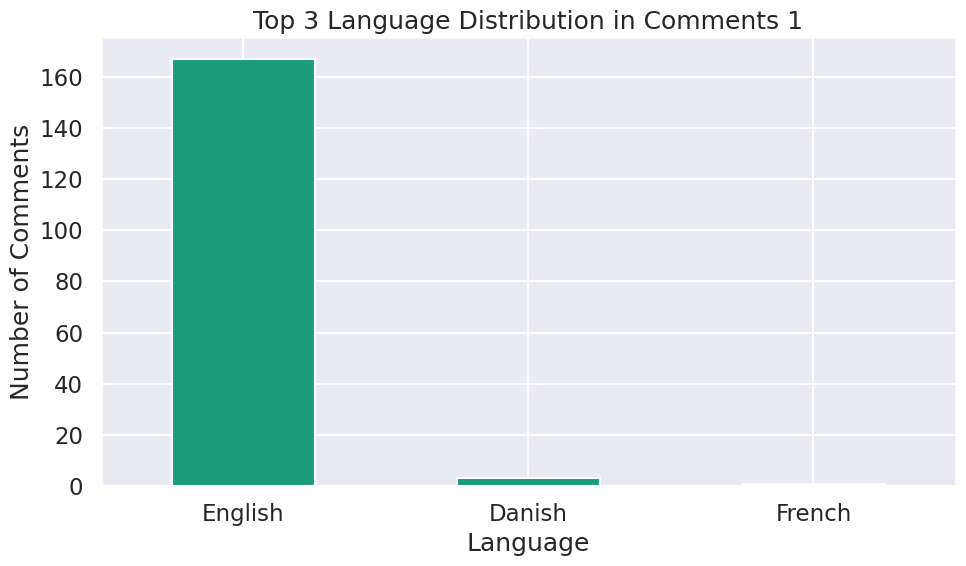

In [68]:
import matplotlib.pyplot as plt
language_list = []
language_list.append(df_1_copy['Detected_Language'].value_counts())

def plot_language(data,name):
    language_names = {
        'en': 'English',
        'af': 'Afrikaans',
        'fr': 'French',
        'it': 'Italian',
        'da': 'Danish',
        # Add more language codes and names as needed
    }


    language_counts = data


    # Get the top 3 languages
    top_languages = language_counts.head(3)

    # Create a bar plot of the top 3 language distribution
    plt.figure(figsize=(10, 6))
    top_languages.plot(kind='bar')
    plt.title('Top 3 Language Distribution in Comments ' + name)
    plt.xlabel('Language')
    plt.ylabel('Number of Comments')
    plt.xticks(range(len(top_languages)), [language_names.get(lang, lang) for lang in top_languages.index])
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Display the plot
    plt.show()
j = 0
for i in language_list:
    plot_language(i,name_list[j])
    j +=1

In [69]:
pip install wordnet

  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10498 sha256=ffa3d6bddfe50e0cc41599e1df4e386876e14db1ec784e54e3a4e6db81ba302c
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


In [70]:
import nltk
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer
import string

# Create a copy of the original DataFrame
df_lem_1_copy = df_clean_1


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def remove_emojis(text):
    # Remove emojis using regex
    text = re.sub(r'[^\w\s'+string.punctuation+']', '', text)

    return text

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)

    # Remove emojis
    text = remove_emojis(text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'@[A-Za-z0–9]+', '', text)  # Remove @mentions replace with blank
    text = re.sub(r'#', '', text)  # Remove the ‘#’ symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text)
    words = word_tokenize(text)

    # Lemmatize each word using WordNetLemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]

    words = [word for word in words if word not in stopwords.words('english')]
    clean_text = ' '.join(words)
    return clean_text

# Apply preprocessing to post titles and comment text in the copied DataFrame
df_lem_1_copy['Review'] = df_lem_1_copy['Review'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [71]:
sid = SentimentIntensityAnalyzer()

In [72]:
df_lem_1_copy['review_text_sentiment'], df_lem_1_copy['review_text_compound'] = zip(*df_lem_1_copy['Review'].apply(analyze_sentiment_vader))


In [73]:
# Import necessary libraries and functions
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_weighted_sentiment_vader(text):
    # Analyze sentiment using VADER
    sentiment_scores = sia.polarity_scores(text)

    # Calculate the length-based weight for the sentiment score
    comment_length = len(text.split())
    weight = 1 / (comment_length + 1)  # Add 1 to avoid division by zero

    # Apply the weight to the sentiment scores
    weighted_compound = sentiment_scores['compound'] * weight

    # Return the weighted sentiment score
    return weighted_compound

def analyze_sentiment_vader(text):
    sentiment_scores = sia.polarity_scores(text)

    # Determine sentiment based on compound score
    compound_score = sentiment_scores['compound']

    if compound_score > 0.05:
        sentiment = 'Positive'
    elif compound_score < -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, compound_score

# Apply sentiment analysis using VADER to 'Post Title', 'Post Text', and 'Comment Text' columns
df_lem_1_copy['review_text_sentiment'], df_lem_1_copy['review_text_compound'] = zip(*df_lem_1_copy['Review'].apply(analyze_sentiment_vader))

# Apply sentiment analysis with weighted scores to 'Comment Text' column
df_lem_1_copy['weighted_review_compound'] = df_lem_1_copy['Review'].apply(analyze_weighted_sentiment_vader)

In [ ]:
df_lem_1_copy

,Icon,Name,Detail,Time,Review,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Detected_Language,review_text_sentiment,review_text_compound,weighted_review_compound
0,https://lh3.googleusercontent.com/a-/ALV-UjVg1...,Sarah Abendschein,Local Guide · 75 reviews · 71 photos,6 months ago,excellent dog park easy parking safe fence wat...,NaN,NaN,Share,NaN,en,Positive,0.9460,0.052556
1,https://lh3.googleusercontent.com/a-/ALV-UjU-C...,Antony D,Local Guide · 228 reviews · 697 photos,a week ago,soccer awesome great environment,NaN,NaN,Like,Share,en,Positive,0.8481,0.169620
2,https://lh3.googleusercontent.com/a-/ALV-UjXAU...,cj,Local Guide · 56 reviews · 16 photos,4 months ago,conveniently located right middle hustle bustl...,NaN,NaN,Share,Like,en,Positive,0.4215,0.015054
3,https://lh3.googleusercontent.com/a-/ALV-UjXWp...,Rouven Grossmann,"Local Guide · 253 reviews · 2,070 photos",2 years ago,favourite park close melbourne cbd lot space d...,NaN,NaN,Share,NaN,en,Positive,0.2500,0.015625
4,https://lh3.googleusercontent.com/a/ACg8ocLB5p...,Mayank Minki,Local Guide · 39 reviews · 72 photos,a year ago,clean fenced easy park dog park heart cbd park...,NaN,NaN,Share,NaN,en,Positive,0.6808,0.045387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,https://lh3.googleusercontent.com/a/ACg8ocJMO7...,Stuart M,Local Guide · 8 reviews · 1 photo,7 years ago,nan,NaN,NaN,NaN,NaN,en,Neutral,0.0000,0.000000
337,https://lh3.googleusercontent.com/a/ACg8ocKzXB...,BdM,Local Guide · 190 reviews · 246 photos,7 years ago,nan,NaN,NaN,NaN,NaN,en,Neutral,0.0000,0.000000
338,https://lh3.googleusercontent.com/a-/ALV-UjUZB...,Grant French,NaN,9 years ago,nan,NaN,NaN,NaN,NaN,en,Neutral,0.0000,0.000000
339,https://lh3.googleusercontent.com/a-/ALV-UjWIF...,james horton,Local Guide · 157 reviews · 206 photos,9 years ago,nan,NaN,NaN,NaN,NaN,en,Neutral,0.0000,0.000000


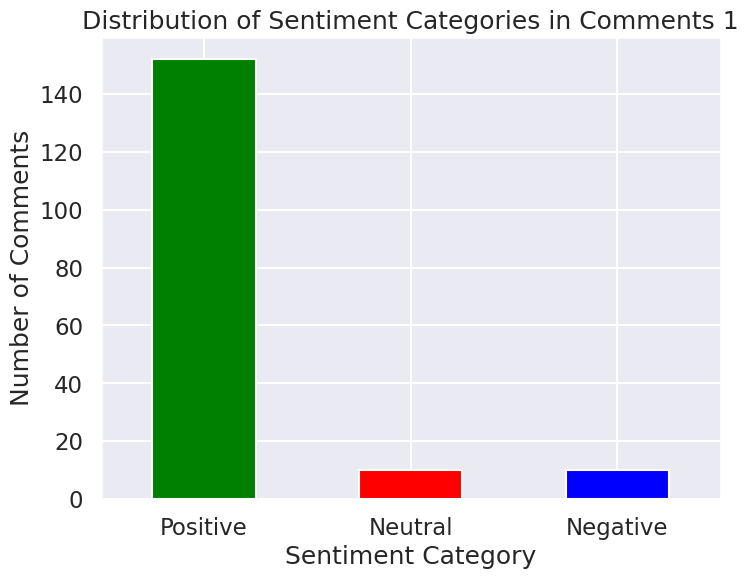

review_text_sentiment
Positive    152
Neutral      10
Negative     10
Name: count, dtype: int64


In [74]:
import pandas as pd
import matplotlib.pyplot as plt


senti_list = []
# Count sentiment categories
senti_list.append(df_lem_1_copy['review_text_sentiment'].value_counts())

def polt_sentiment(data, name):

    sentiment_counts = data
    # Create a bar chart
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.xlabel('Sentiment Category')
    plt.ylabel('Number of Comments')
    plt.title('Distribution of Sentiment Categories in Comments '+ name)
    plt.xticks(rotation=0)
    plt.show()

    # Display sentiment counts
    print(sentiment_counts)
j = 0
for i in senti_list:
    polt_sentiment(i,name_list[j])
    j+= 1
# polt_sentiment(df_lem_aldi_copy['review_text_sentiment'].value_counts(),'Aldi')

In [75]:
from textblob import TextBlob

# Function to get sentiment using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply the function to your DataFrame
df_lem_1_copy['TextBlob Sentiment'] = df_lem_1_copy['Review'].apply(get_sentiment)


# Categorize sentiment
df_lem_1_copy['TextBlob Sentiment Category'] = df_lem_1_copy['TextBlob Sentiment'].apply(
    lambda sentiment: 'Positive' if sentiment > 0 else 'Negative' if sentiment < 0 else 'Neutral')

In [85]:
pd.set_option('display.max_colwidth', None)
# Top 5 Positive Posts (Vader)
top_5_positive_vader_1 = df_lem_1_copy[df_lem_1_copy['review_text_sentiment'] == 'Positive'].head(5)

# Top 5 Negative Posts (Vader)
top_5_negative_vader_1 = df_lem_1_copy[df_lem_1_copy['review_text_sentiment'] == 'Negative'].head(5)

# Top 5 Positive Posts (TextBlob)
top_5_positive_textblob_1 = df_lem_1_copy[df_lem_1_copy['TextBlob Sentiment Category'] == 'Positive'].head(5)

# Top 5 Negative Posts (TextBlob)
top_5_negative_textblob_1 = df_lem_1_copy[df_lem_1_copy['TextBlob Sentiment Category'] == 'Negative'].head(5)

print("Top 5 Positive Posts (Vader):")
print(top_5_positive_vader_1['Review'])

print("\nTop 5 Positive Posts (TextBlob):")
print(top_5_positive_textblob_1['Review'])

print("\nTop 5 Negative Posts (Vader):")
print(top_5_negative_vader_1['Review'])

print("\nTop 5 Negative Posts (TextBlob):")
print(top_5_negative_textblob_1['Review'])

Top 5 Positive Posts (Vader):
0                                                                                           excellent dog park easy parking safe fence ha water poo bag lot lovely shade bench lappy meetup wa fab
1                                                                                                                                                              soccer wa awesome great environment
2    conveniently located right middle hustle bustle unfortunately mean attracts people drink park theyve known leave unsafe rubbish behind also find people le likely clean dog park specifically
3                                                                                                           favourite park close melbourne cbd lot space dog size run around l make friend exhaust
4                                                                                                                  clean fenced easy park dog park heart cbd park boundary road plenty car par

In [81]:
top_5_Positive_textblob_1['Review'][32]

'conveniently located right middle hustle bustle unfortunately mean attracts people drink park theyve known leave unsafe rubbish behind also find people le likely clean dog park specifically'

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

combined_text = df_1_remove_null['Review']

# Tokenization and preprocessing
words = word_tokenize(combined_text.str.lower().str.cat(sep=' '))
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Counting word frequencies
word_freq = Counter(filtered_words)

# Sorting words by frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Display the most common words and their frequencies
for word, freq in sorted_word_freq:
    print(f"{word}: {freq}")


dog: 142
park: 106
dogs: 92
great: 76
fenced: 38
place: 29
people: 27
friendly: 26
run: 24
well: 23
owners: 23
water: 22
bags: 22
plenty: 22
around: 21
good: 20
area: 17
poo: 16
fully: 16
little: 16
nice: 15
small: 14
get: 13
lots: 12
space: 12
play: 12
bring: 12
clean: 10
grass: 10
time: 10
take: 10
big: 10
parking: 9
enough: 9
love: 9
bins: 9
let: 9
fun: 9
lovely: 8
shade: 8
sizes: 8
fountains: 8
loves: 8
lead: 8
pretty: 8
safe: 7
parks: 7
humans: 7
best: 7
city: 7
available: 7
would: 7
large: 7
gates: 7
fur: 7
easy: 6
melbourne: 6
friends: 6
road: 6
seats: 6
spacious: 6
many: 6
inner: 6
leash: 6
always: 6
bit: 6
across: 6
could: 6
enclosed: 6
benches: 5
seating: 5
trees: 5
drinking: 5
behaved: 5
room: 5
maintained: 5
new: 5
fantastic: 5
really: 5
food: 5
need: 5
better: 5
local: 5
although: 5
pick: 5
excellent: 4
awesome: 4
drink: 4
rubbish: 4
find: 4
favourite: 4
one: 4
two: 4
free: 4
ball: 4
winter: 4
rain: 4
times: 4
secure: 4
socialising: 4
babies: 4
issue: 4
coffee: 4
facilitie

In [45]:
df_1_copy['Review'].dropna(inplace=True)

In [46]:
df_1_copy

,Icon,Name,Detail,Time,Review,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,https://lh3.googleusercontent.com/a-/ALV-UjVg1...,Sarah Abendschein,Local Guide · 75 reviews · 71 photos,6 months ago,excellent dog park easy parking safe fence wat...,NaN,NaN,Share,NaN
1,https://lh3.googleusercontent.com/a-/ALV-UjU-C...,Antony D,Local Guide · 228 reviews · 697 photos,a week ago,soccer awesome great environment,NaN,NaN,Like,Share
2,https://lh3.googleusercontent.com/a-/ALV-UjXAU...,cj,Local Guide · 56 reviews · 16 photos,4 months ago,conveniently located right middle hustle bustl...,NaN,NaN,Share,Like
3,https://lh3.googleusercontent.com/a-/ALV-UjXWp...,Rouven Grossmann,"Local Guide · 253 reviews · 2,070 photos",2 years ago,favourite park close melbourne cbd lot space d...,NaN,NaN,Share,NaN
4,https://lh3.googleusercontent.com/a/ACg8ocLB5p...,Mayank Minki,Local Guide · 39 reviews · 72 photos,a year ago,clean fenced easy park dog park heart cbd park...,NaN,NaN,Share,NaN
...,...,...,...,...,...,...,...,...,...
336,https://lh3.googleusercontent.com/a/ACg8ocJMO7...,Stuart M,Local Guide · 8 reviews · 1 photo,7 years ago,nan,NaN,NaN,NaN,NaN
337,https://lh3.googleusercontent.com/a/ACg8ocKzXB...,BdM,Local Guide · 190 reviews · 246 photos,7 years ago,nan,NaN,NaN,NaN,NaN
338,https://lh3.googleusercontent.com/a-/ALV-UjUZB...,Grant French,NaN,9 years ago,nan,NaN,NaN,NaN,NaN
339,https://lh3.googleusercontent.com/a-/ALV-UjWIF...,james horton,Local Guide · 157 reviews · 206 photos,9 years ago,nan,NaN,NaN,NaN,NaN


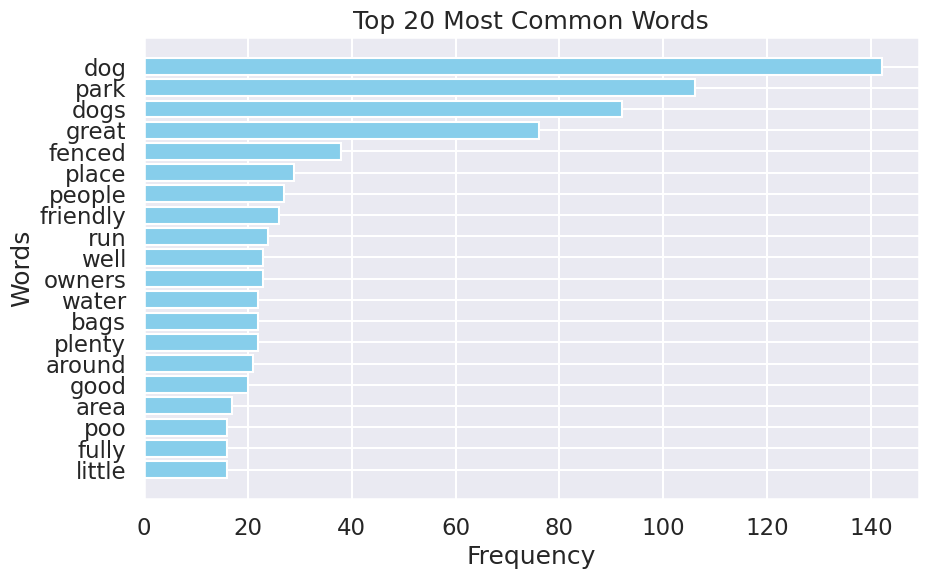

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Combine 'Comment Text' and 'Post Title' columns
combined_text = df_1_remove_null['Review']

# Tokenization and preprocessing
words = word_tokenize(combined_text.str.lower().str.cat(sep=' '))
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Counting word frequencies
word_freq = Counter(filtered_words)

# Sorting words by frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract top N words and their frequencies for visualization
top_words = [word for word, freq in sorted_word_freq[:20]]
top_freqs = [freq for word, freq in sorted_word_freq[:20]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')
plt.yticks(rotation=0)
plt.gca().invert_yaxis()  # Invert y-axis to display highest frequency at the top
plt.show()


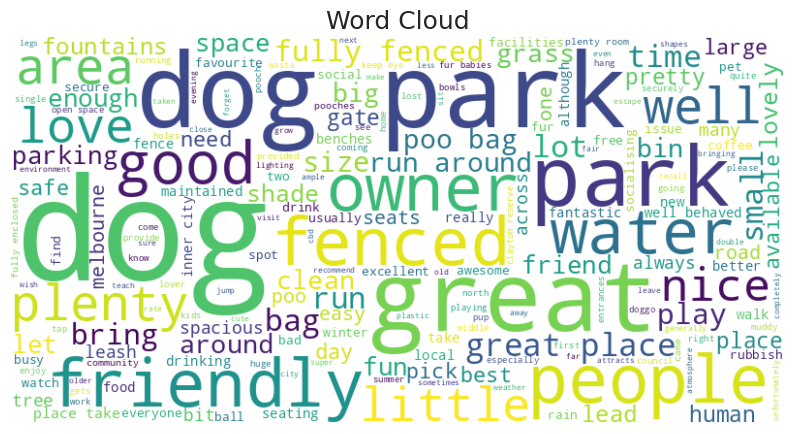

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine 'Comment Text' and 'Post Title' columns
combined_text = df_1_remove_null['Review']

# Tokenization and preprocessing (similar to what you did before)
words = word_tokenize(combined_text.str.lower().str.cat(sep=' '))
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Create a space-separated string from the filtered words
filtered_text = ' '.join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud')
plt.show()
